In [1]:
!pip install plyfile trimesh

In [2]:
!pip install mesh_to_sdf

In [3]:
!git clone https://github.com/kelvis24/simple-3d-objects.git

!pip install torch

!pip install matplotlib

fatal: destination path 'simple-3d-objects' already exists and is not an empty directory.


In [4]:
!pip install open3d

In [5]:
!pip install PlyData

In [6]:
import numpy as np
import torch
from plyfile import PlyData
import os

# Custom function to load point cloud data from binary .ply files
def load_point_cloud_from_ply(file_path):
    ply_data = PlyData.read(file_path)
    x = ply_data['vertex']['x']
    y = ply_data['vertex']['y']
    z = ply_data['vertex']['z']
    points = torch.tensor(np.column_stack((x, y, z)), dtype=torch.float32)
    return points

In [7]:
#  Load all point clouds from the directory
point_clouds_directory = '/content/simple-3d-objects'
point_cloud_files = [f for f in os.listdir(point_clouds_directory) if f.endswith('.ply')]
point_clouds = [load_point_cloud_from_ply(os.path.join(point_clouds_directory, f)) for f in point_cloud_files]


In [31]:
print(len(point_clouds))

11


In [38]:
import trimesh
import numpy as np

def point_cloud_to_mesh(point_cloud):
    # Create a Trimesh object from the point cloud vertices
    mesh = trimesh.Trimesh(vertices=point_cloud)

    # Create a convex hull from the mesh
    hull = mesh.convex_hull

    # Extract the vertices and faces of the convex hull
    vertices = hull.vertices
    faces = hull.faces

    # Create a new Trimesh object from the convex hull vertices and faces
    convex_mesh = trimesh.Trimesh(vertices=vertices, faces=faces)

    return convex_mesh

new_meshes = []

for point_cloud in point_clouds:
    # Convert point cloud to mesh
    mesh = point_cloud_to_mesh(point_cloud)
    new_meshes.append(mesh)


In [70]:
print(len(new_meshes))

11


In [22]:
import open3d as o3d

# Reconstruct a surface mesh from a point cloud
def reconstruct_surface_mesh(point_cloud):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud)
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
    distances = pcd.compute_nearest_neighbor_distance()
    avg_dist = np.mean(distances)
    radii = [avg_dist, avg_dist * 2]
    mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector(radii))
    return mesh


In [28]:
import open3d as o3d

def create_meshes(point_clouds):
    meshes = []
    for pc in point_clouds:
        mesh = reconstruct_surface_mesh(pc)
        meshes.append(mesh)
    return meshes

# Example usage:
meshes = create_meshes(point_clouds)


In [24]:
print(len(meshes))

11


Mesh 1 - Vertices: (95435, 3), Triangles: (153521, 3)
Mesh 2 - Vertices: (71265, 3), Triangles: (125624, 3)
Mesh 3 - Vertices: (85127, 3), Triangles: (118184, 3)
Mesh 4 - Vertices: (61460, 3), Triangles: (83134, 3)
Mesh 5 - Vertices: (5000, 3), Triangles: (1454, 3)
Mesh 6 - Vertices: (500, 3), Triangles: (365, 3)
Mesh 7 - Vertices: (500, 3), Triangles: (0, 3)
Mesh 7 has zero-size arrays.
Mesh 8 - Vertices: (5000, 3), Triangles: (5690, 3)
Mesh 9 - Vertices: (500, 3), Triangles: (996, 3)
Mesh 10 - Vertices: (5000, 3), Triangles: (5955, 3)
Mesh 11 - Vertices: (57264, 3), Triangles: (87186, 3)


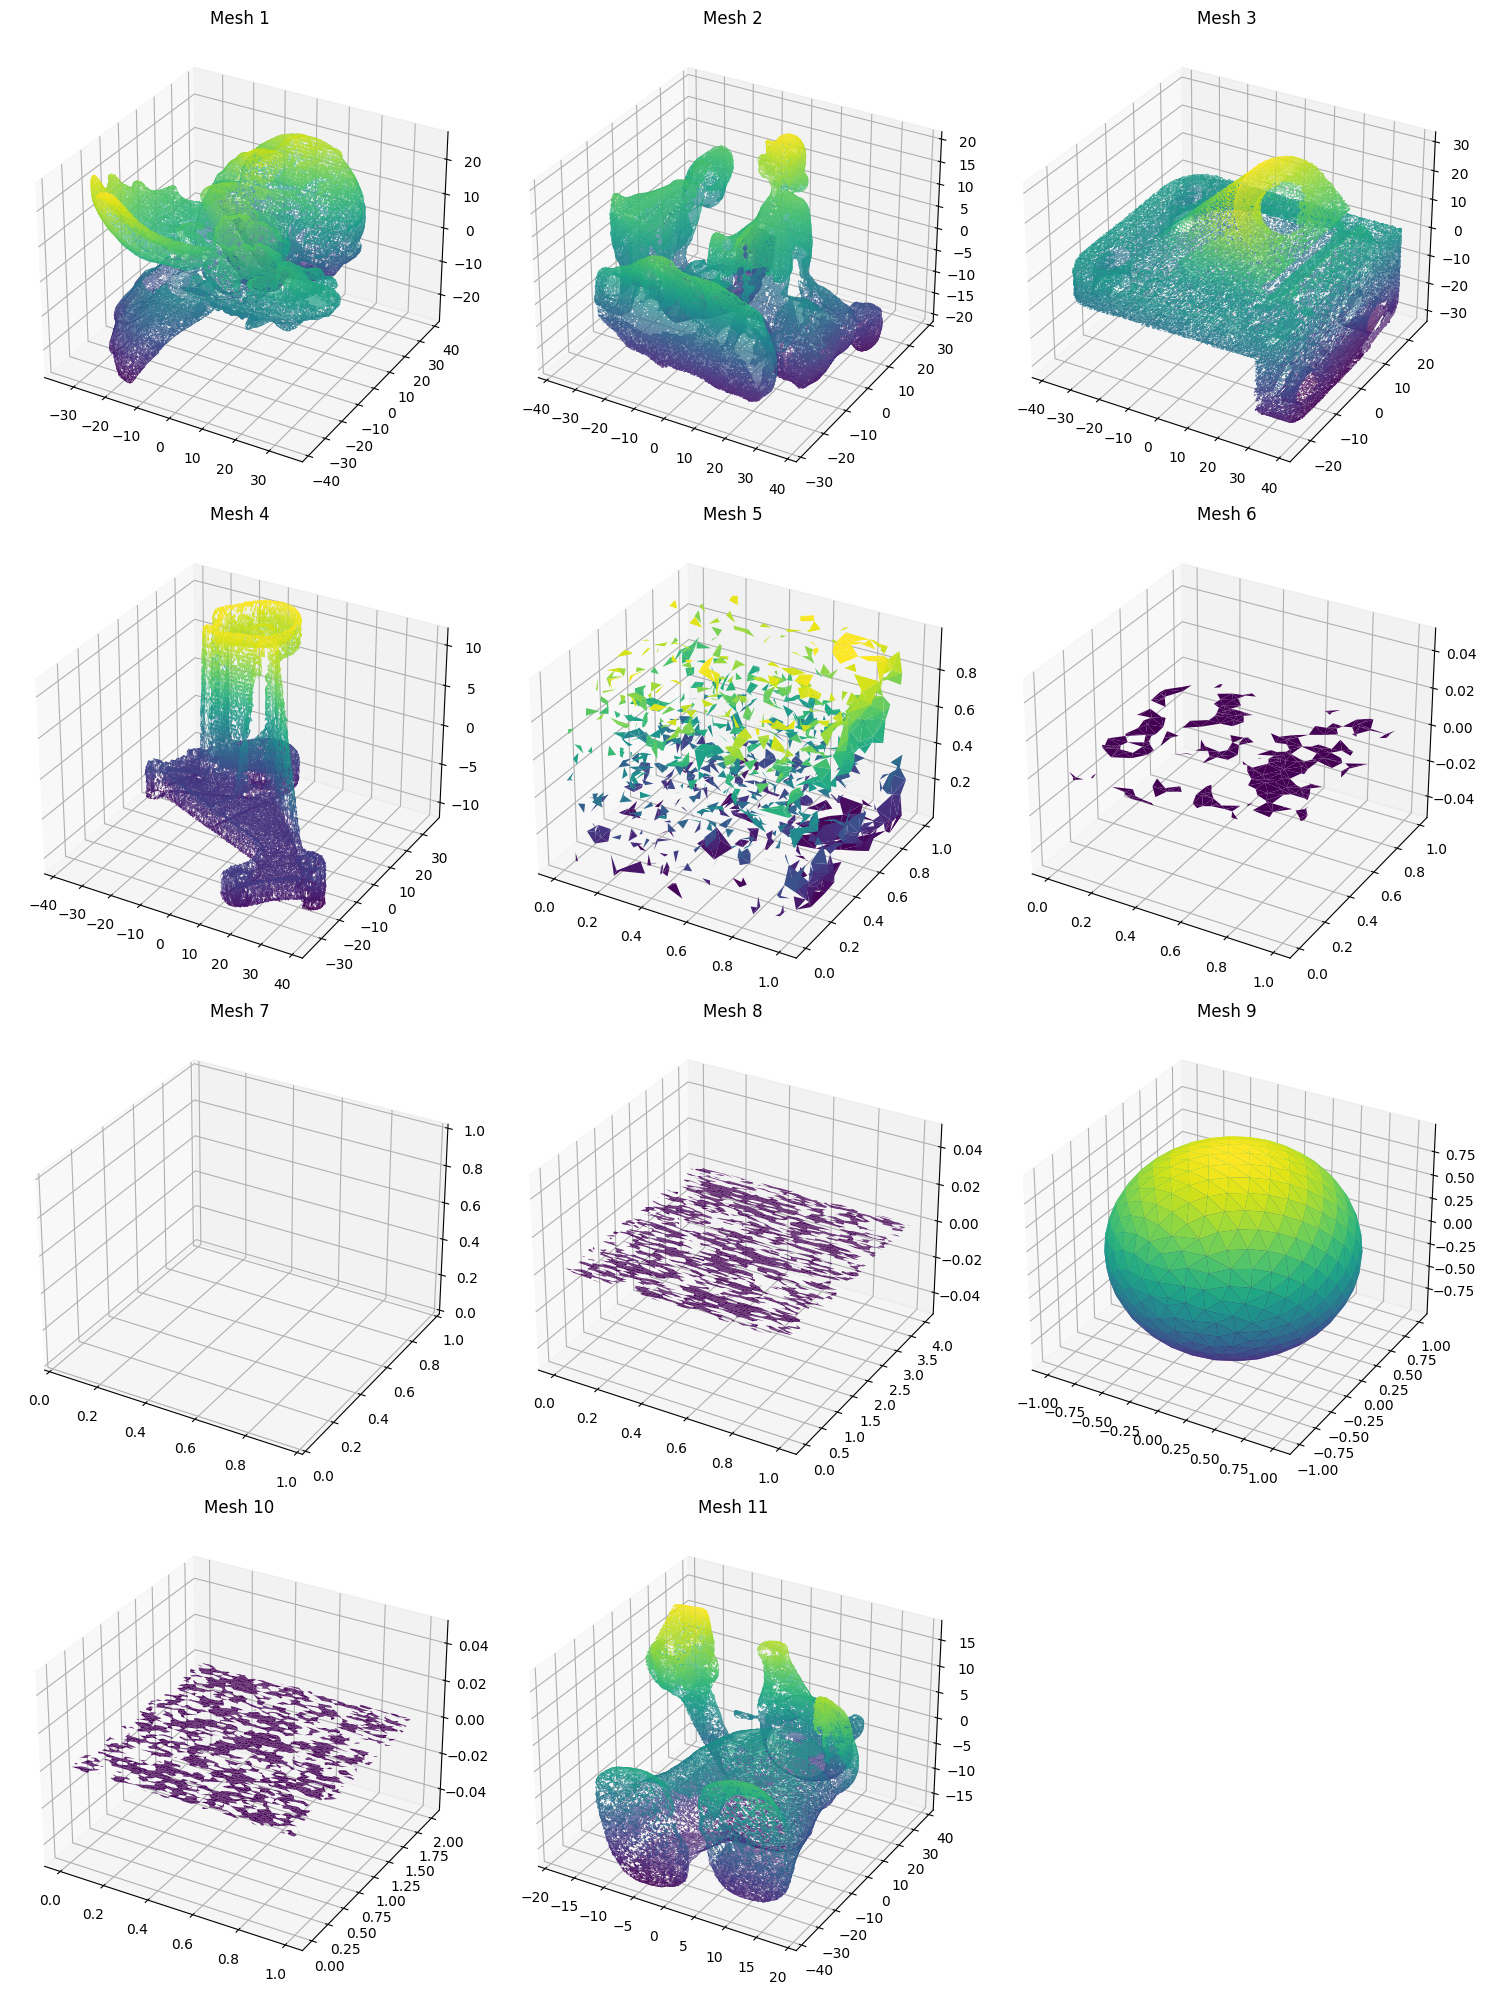

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_meshes(meshes):
    num_meshes = len(meshes)
    num_cols = 3  # Adjust the number of columns as needed
    num_rows = (num_meshes + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), subplot_kw={'projection': '3d'})
    axes = axes.flatten()

    for i, (ax, mesh) in enumerate(zip(axes, meshes)):
        ax.set_title(f"Mesh {i+1}")

        # Convert vertices and triangles to numpy arrays
        vertices = np.asarray(mesh.vertices)
        triangles = np.asarray(mesh.triangles)

        print(f"Mesh {i+1} - Vertices: {vertices.shape}, Triangles: {triangles.shape}")

        if vertices.shape[0] == 0 or triangles.shape[0] == 0:
            print(f"Mesh {i+1} has zero-size arrays.")
            continue

        ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles, cmap='viridis')

    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_meshes(meshes)


Mesh 1 - Vertices: (633, 3), Triangles: (1262, 3, 3)
Mesh 2 - Vertices: (550, 3), Triangles: (1096, 3, 3)
Mesh 3 - Vertices: (368, 3), Triangles: (732, 3, 3)
Mesh 4 - Vertices: (337, 3), Triangles: (670, 3, 3)
Mesh 5 - Vertices: (109, 3), Triangles: (214, 3, 3)
Mesh 6 - Vertices: (61, 3), Triangles: (118, 3, 3)
Mesh 7 - Vertices: (499, 3), Triangles: (994, 3, 3)
Mesh 8 - Vertices: (102, 3), Triangles: (200, 3, 3)
Mesh 9 - Vertices: (500, 3), Triangles: (996, 3, 3)
Mesh 10 - Vertices: (94, 3), Triangles: (184, 3, 3)
Mesh 11 - Vertices: (516, 3), Triangles: (1028, 3, 3)


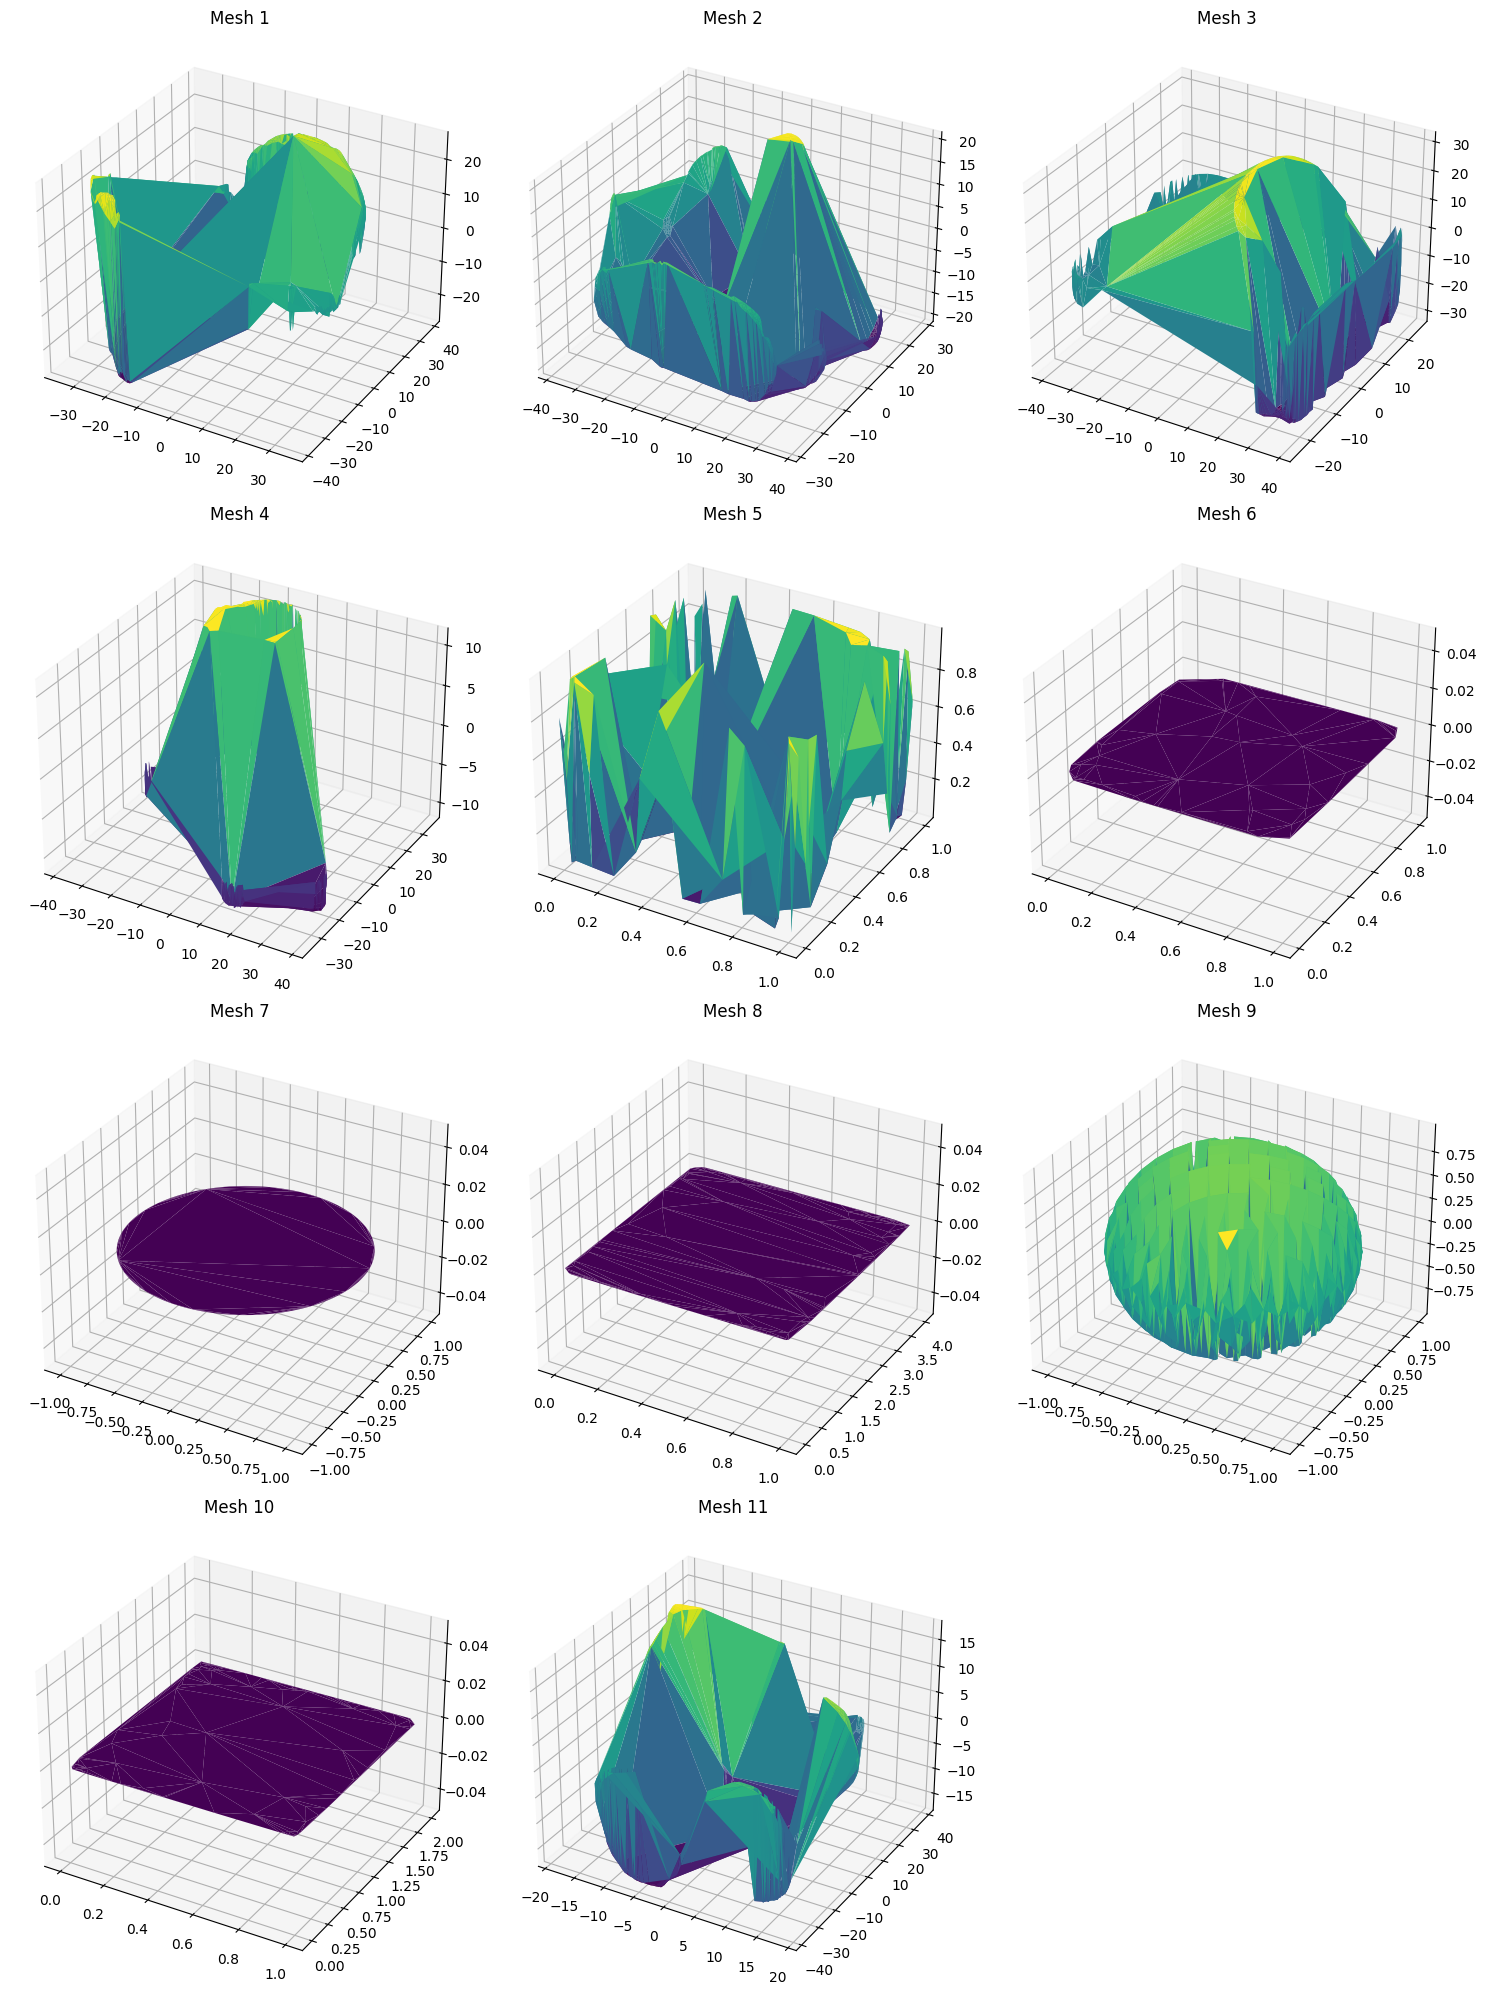

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_meshes(meshes):
    num_meshes = len(meshes)
    num_cols = 3  # Adjust the number of columns as needed
    num_rows = (num_meshes + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), subplot_kw={'projection': '3d'})
    axes = axes.flatten()

    for i, (ax, mesh) in enumerate(zip(axes, meshes)):
        ax.set_title(f"Mesh {i+1}")

        # Convert vertices and triangles to numpy arrays
        vertices = np.asarray(mesh.vertices)
        triangles = np.asarray(mesh.triangles)

        print(f"Mesh {i+1} - Vertices: {vertices.shape}, Triangles: {triangles.shape}")

        if vertices.shape[0] == 0 or triangles.shape[0] == 0:
            print(f"Mesh {i+1} has zero-size arrays.")
            continue

        ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=triangles, cmap='viridis')

    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
visualize_meshes(new_meshes)


In [41]:
import os
os.environ['PYOPENGL_PLATFORM'] = 'egl'

In [42]:
from mesh_to_sdf import sample_sdf_near_surface
import numpy as np

def generate_xyz_sdf(mesh):
    xyz, sdf = sample_sdf_near_surface(mesh, number_of_points=15000)
    return xyz, sdf

def writeSDFToNPZ(xyz, sdfs, filename):
    num_vert = len(xyz)
    pos = []
    neg = []

    for i in range(num_vert):
        v = xyz[i]
        s = sdfs[i]

        if s > 0:
            for j in range(3):
                pos.append(v[j])
            pos.append(s)
        else:
            for j in range(3):
                neg.append(v[j])
            neg.append(s)

    np.savez(filename, pos=np.array(pos).reshape(-1, 4), neg=np.array(neg).reshape(-1, 4))

def process(mesh, target_filepath):
    xyz, sdfs = generate_xyz_sdf(mesh)
    writeSDFToNPZ(xyz, sdfs, target_filepath)

target_path = "./processed_data/train/"

isExist = os.path.exists(target_path)

if not isExist:
   os.makedirs(target_path)

N = len(meshes)
print(N)

it = 0

for mesh in new_meshes:
    mesh_name = f"mesh{it + 1}"
    target_filepath = os.path.join(target_path, f"{mesh_name}_processed.npz")

    process(mesh, target_filepath)

    it += 1
    print("Process finished:", mesh_name, it, "/", N)


11
Process finished: mesh1 1 / 11
Process finished: mesh2 2 / 11
Process finished: mesh3 3 / 11
Process finished: mesh4 4 / 11
Process finished: mesh5 5 / 11
Process finished: mesh6 6 / 11
Process finished: mesh7 7 / 11
Process finished: mesh8 8 / 11
Process finished: mesh9 9 / 11
Process finished: mesh10 10 / 11
Process finished: mesh11 11 / 11


In [44]:
import torch
from torch.utils.data import Dataset

import numpy as np
import random
from pathlib import Path

class ShapeNet_Dataset(Dataset):

    def __init__(self, dataset_path):
        self.dataset = []
        for file_name in sorted(Path(dataset_path).glob("*.npz")):
            npz = np.load(file_name)
            pos_tensor = torch.from_numpy(npz["pos"])
            neg_tensor = torch.from_numpy(npz["neg"])

            # split the sample into half
            half = int(15000 / 2)

            pos_size = pos_tensor.shape[0]
            neg_size = neg_tensor.shape[0]

            if pos_size <= half:
                random_pos = (torch.rand(half) * pos_tensor.shape[0]).long()
                sample_pos = torch.index_select(pos_tensor, 0, random_pos)
            else:
                pos_start_ind = random.randint(0, pos_size - half)
                sample_pos = pos_tensor[pos_start_ind : (pos_start_ind + half)]

            if neg_size <= half:
                random_neg = (torch.rand(half) * neg_tensor.shape[0]).long()
                sample_neg = torch.index_select(neg_tensor, 0, random_neg)
            else:
                neg_start_ind = random.randint(0, neg_size - half)
                sample_neg = neg_tensor[neg_start_ind : (neg_start_ind + half)]

            samples = torch.cat([sample_pos, sample_neg], 0)

            self.dataset.append(samples)

    def __getitem__(self, index):
        return index, self.dataset[index]

    def __len__(self):
        return len(self.dataset)

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Decoder(nn.Module):

    def __init__(
        self,
        latent_size=256,
        dims=[512, 512, 512, 512, 512, 512, 512, 512],
        dropout=[0, 1, 2, 3, 4, 5, 6, 7],
        dropout_prob=0.2,
        norm_layers=[0, 1, 2, 3, 4, 5, 6, 7],
        latent_in=[4],
        weight_norm=True):

        super(Decoder, self).__init__()

        dims = [latent_size + 3] + dims + [1]

        self.num_layers = len(dims)
        self.norm_layers = norm_layers
        self.latent_in = latent_in
        self.weight_norm = weight_norm

        for layer in range(0, self.num_layers - 1):
            if layer + 1 in latent_in:
                out_dim = dims[layer + 1] - dims[0]
            else:
                out_dim = dims[layer + 1]

            if weight_norm and layer in self.norm_layers:
                setattr(
                    self,
                    "lin" + str(layer),
                    nn.utils.weight_norm(nn.Linear(dims[layer], out_dim)),
                )
            else:
                setattr(self, "lin" + str(layer), nn.Linear(dims[layer], out_dim))

        self.relu = nn.ReLU()
        self.dropout_prob = dropout_prob
        self.dropout = dropout
        self.th = nn.Tanh()

    def forward(self, input):
        x = input

        for layer in range(0, self.num_layers - 1):
            lin = getattr(self, "lin" + str(layer))
            if layer in self.latent_in:
                x = torch.cat([x, input], 1)

            x = lin(x)

            if layer < self.num_layers - 2:
                x = self.relu(x)
                if self.dropout is not None and layer in self.dropout:
                    x = F.dropout(x, p=self.dropout_prob, training=self.training)

        if hasattr(self, "th"):
            x = self.th(x)

        return x

In [46]:
'''
This file is for evaluating the prediction of the SDF decoder.
We compare the TP, TN, FP, FN of the prediction with the ground truth.
'''

def eval_ROC(gt_sdf, pred_sdf):

    TP, TN, FP, FN = 0, 0, 0, 0
    n = gt_sdf.shape[0]

    for i in range(n):
        if gt_sdf[i] > 0 and pred_sdf[i] > 0:
            TP += 1
        elif gt_sdf[i] > 0 and pred_sdf[i] < 0:
            FN += 1
        elif gt_sdf[i] < 0 and pred_sdf[i] < 0:
            TN += 1
        else:
            FP += 1

    return [TP, TN, FP, FN]

In [47]:
import torch

import numpy as np
import plyfile
import skimage.measure

# Learn the latent code for the test model
def reconstruct_latent(decoder,
                       sdf_data,
                       iterations = 800,
                       init_std = 0.01,
                       lr = 5e-4):

    # parameters
    latent_size = 256
    num_samples = 15000

    # initilise latent
    latent = torch.ones(1, latent_size).normal_(mean=0, std=init_std).cuda()
    latent.requires_grad = True

    # set optimizer and loss
    optimizer = torch.optim.Adam([latent], lr=lr)
    loss_l1 = torch.nn.L1Loss()
    minT, maxT = -0.1, 0.1 # clamp

    for it in range(iterations):

        decoder.eval()

        xyz = sdf_data.cuda()[:, 0:3]
        sdf_gt = sdf_data.cuda()[:, 3].unsqueeze(1)
        sdf_gt = torch.clamp(sdf_gt, minT, maxT)

        optimizer.zero_grad()

        latent_inputs = latent.expand(num_samples, -1)
        inputs = torch.cat([latent_inputs, xyz], 1)
        pred_sdf = decoder(inputs)
        pred_sdf = torch.clamp(pred_sdf, minT, maxT)

        loss = loss_l1(pred_sdf, sdf_gt)
        loss += 1e-4 * torch.mean(latent.pow(2)) # L2 regularization

        loss.backward()
        optimizer.step()

        loss_num = loss.cpu().data.numpy()
        print('[%d/%d] Loss: %.5f' % (it+1, iterations, loss_num))

    return latent

# Predict SDF with the latent code and trained decoder
def decode_sdf(decoder, latent_vector, queries):
    num_samples = queries.shape[0]
    latent_repeat = latent_vector.expand(num_samples, -1)

    inputs = torch.cat([latent_repeat, queries.cuda()], 1)

    sdf = decoder(inputs)

    return sdf

'''
Rebuild mesh from SDF predictions
This function is adapted from: https://github.com/facebookresearch/DeepSDF
'''
def convert_sdf_samples_to_ply(
    pytorch_3d_sdf_tensor,
    voxel_grid_origin,
    voxel_size,
    ply_filename_out):
    """
    Convert sdf samples to .ply

    :param pytorch_3d_sdf_tensor: a torch.FloatTensor of shape (n,n,n)
    :voxel_grid_origin: a list of three floats: the bottom, left, down origin of the voxel grid
    :voxel_size: float, the size of the voxels
    :ply_filename_out: string, path of the filename to save to

    This function adapted from: https://github.com/RobotLocomotion/spartan
    """

    numpy_3d_sdf_tensor = pytorch_3d_sdf_tensor.numpy()

    verts, faces, normals, values = skimage.measure.marching_cubes(
        numpy_3d_sdf_tensor, level=0.0, spacing=[voxel_size] * 3
    )

    # transform from voxel coordinates to camera coordinates
    # note x and y are flipped in the output of marching_cubes
    mesh_points = np.zeros_like(verts)
    mesh_points[:, 0] = voxel_grid_origin[0] + verts[:, 0]
    mesh_points[:, 1] = voxel_grid_origin[1] + verts[:, 1]
    mesh_points[:, 2] = voxel_grid_origin[2] + verts[:, 2]

    # try writing to the ply file

    num_verts = verts.shape[0]
    num_faces = faces.shape[0]

    verts_tuple = np.zeros((num_verts,), dtype=[("x", "f4"), ("y", "f4"), ("z", "f4")])

    for i in range(0, num_verts):
        verts_tuple[i] = tuple(mesh_points[i, :])

    faces_building = []
    for i in range(0, num_faces):
        faces_building.append(((faces[i, :].tolist(),)))
    faces_tuple = np.array(faces_building, dtype=[("vertex_indices", "i4", (3,))])

    el_verts = plyfile.PlyElement.describe(verts_tuple, "vertex")
    el_faces = plyfile.PlyElement.describe(faces_tuple, "face")

    ply_data = plyfile.PlyData([el_verts, el_faces])
    ply_data.write(ply_filename_out)

def create_mesh(filename,
                decoder,
                latent_vec,
                N=128,
                max_batch=16 ** 3):

    decoder.eval()

    # NOTE: the voxel_origin is actually the (bottom, left, down) corner, not the middle
    voxel_origin = [-1, -1, -1]
    voxel_size = 2.0 / (N - 1)

    overall_index = torch.arange(0, N ** 3, 1, out=torch.LongTensor())
    samples = torch.zeros(N ** 3, 4)

    # transform first 3 columns
    # to be the x, y, z index
    samples[:, 2] = overall_index % N
    samples[:, 1] = (overall_index.long() / N) % N
    samples[:, 0] = ((overall_index.long() / N) / N) % N

    # transform first 3 columns
    # to be the x, y, z coordinate
    samples[:, 0] = (samples[:, 0] * voxel_size) + voxel_origin[2]
    samples[:, 1] = (samples[:, 1] * voxel_size) + voxel_origin[1]
    samples[:, 2] = (samples[:, 2] * voxel_size) + voxel_origin[0]

    num_samples = N ** 3

    samples.requires_grad = False

    head = 0

    while head < num_samples:
        sample_subset = samples[head : min(head + max_batch, num_samples), 0:3]#.cuda()
        samples[head : min(head + max_batch, num_samples), 3] = (
            decode_sdf(decoder, latent_vec, sample_subset)
            .squeeze(1)
            .detach()
            .cpu()
        )
        head += max_batch

    sdf_values = samples[:, 3]
    sdf_values = sdf_values.reshape(N, N, N)

    convert_sdf_samples_to_ply(
        sdf_values.data.cpu(),
        voxel_origin,
        voxel_size,
        filename + ".ply"
    )


def reconstruct(test_sample,
                decoder,
                filename,
                lat_iteration,
                lat_init_std = 0.01,
                lat_lr = 5e-4,
                N=128,
                max_batch=16 ** 3):

    # pass the test model to decoder
    _, test_sdf_data = test_sample

    print("---- Fitting latent vector ----")
    latent_vector = reconstruct_latent(decoder,
                                       test_sdf_data,
                                       iterations = lat_iteration,
                                       init_std = lat_init_std,
                                       lr = lat_lr)

    print("---- Reconstructing mesh ----")
    print(" This could take a while ")

    create_mesh(filename,
                decoder,
                latent_vector,
                N=N,
                max_batch=max_batch)

    print("Mesh saved to " + filename + ".ply")

In [52]:
import torch
from torch.utils.data import DataLoader

import numpy as np
import random

# from model.dataset import ShapeNet_Dataset
# from model.decoder import Decoder

def train_decoder(epochs = 500,
                batch_size=5,
                lat_vecs_std = 0.01,
                decoder_lr = 0.0005,
                lat_vecs_lr = 0.001,
                train_data_path = "/content/processed_data/train",
                checkpoint_save_path = "/content/checkpoints/"):

    # ------------ set random seed ------------

    np.random.seed(42)
    torch.manual_seed(42)
    random.seed(42)

    # ------------ setting device on GPU if available, else CPU ------------

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)

    # ------------ load dataset ------------

    train_dataset = ShapeNet_Dataset(train_data_path)
    torch_train = DataLoader(train_dataset,shuffle=True, batch_size=batch_size, num_workers=1)

    # ------------ load auto decoder model ------------

    SDF_autodecoder = Decoder().to(device)

    # ------------ set training parameters ------------

    # initializa latent vectors
    lat_vecs = torch.nn.Embedding(len(train_dataset), 256, max_norm=1.0).cuda()
    torch.nn.init.normal_(lat_vecs.weight.data, 0.0, lat_vecs_std)

    # set optimizer
    optimizer_all = torch.optim.Adam(
                    [{"params": SDF_autodecoder.parameters(),
                    "lr": decoder_lr},
                    {"params": lat_vecs.parameters(),
                    "lr": lat_vecs_lr}])
    # loss function
    loss_l1 = torch.nn.L1Loss(reduction="sum")

    # other parameters
    minT, maxT = -0.1, 0.1 # clamp

    # ------------ training process ------------

    print("---- start training ----")
    loss_log = []

    for epoch in range(epochs):

        SDF_autodecoder.train()

        losses = []

        for index, train_data in torch_train:

            train_data = train_data.reshape(-1,4).cuda()
            num_sdf_samples = train_data.shape[0]
            train_data.requires_grad = False

            xyz = train_data[:, 0:3]
            sdf_gt = train_data[:, 3].unsqueeze(1)
            sdf_gt = torch.clamp(sdf_gt, minT, maxT)

            optimizer_all.zero_grad()

            # concatenate latent vector and xyz query
            indices = index.cuda().unsqueeze(-1).repeat(1, 15000).view(-1)
            batch_vecs = lat_vecs(indices)
            input = torch.cat([batch_vecs, xyz], dim=1)

            # NN optimization
            pred_sdf = SDF_autodecoder(input)
            pred_sdf = torch.clamp(pred_sdf, minT, maxT)

            loss = loss_l1(pred_sdf, sdf_gt.cuda()) / num_sdf_samples
            loss.backward()
            losses.append(loss.data.mean().cpu())

            optimizer_all.step()

        # Print batch loss
        epoch_loss = np.mean(losses)
        loss_log.append(epoch_loss)
        print('[%d/%d] Loss: %.5f' % (epoch+1, epochs, epoch_loss))

        torch.save({
                'epoch': epoch,
                'model': SDF_autodecoder.state_dict(),
                'latent_vectors': lat_vecs.state_dict(),
                'optimizer': optimizer_all.state_dict(),
                'loss_log': loss_log,
                }, checkpoint_save_path + str(epoch+1) + ".pt")

In [53]:
import os

checkpoint_save_path = "/content/checkpoints/"

# Check if the directory exists
if not os.path.exists(checkpoint_save_path):
    # If not, create it
    os.makedirs(checkpoint_save_path)


In [54]:
train_decoder()

Using device: cuda


/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


---- start training ----
[1/500] Loss: 0.02115
[2/500] Loss: 0.01266
[3/500] Loss: 0.01104
[4/500] Loss: 0.01210
[5/500] Loss: 0.00905
[6/500] Loss: 0.00866
[7/500] Loss: 0.00821
[8/500] Loss: 0.00904
[9/500] Loss: 0.00774
[10/500] Loss: 0.00843
[11/500] Loss: 0.00792
[12/500] Loss: 0.00803
[13/500] Loss: 0.00742
[14/500] Loss: 0.00756
[15/500] Loss: 0.00717
[16/500] Loss: 0.00700
[17/500] Loss: 0.00693
[18/500] Loss: 0.00676
[19/500] Loss: 0.00693
[20/500] Loss: 0.00603
[21/500] Loss: 0.00605
[22/500] Loss: 0.00610
[23/500] Loss: 0.00622
[24/500] Loss: 0.00574
[25/500] Loss: 0.00601
[26/500] Loss: 0.00516
[27/500] Loss: 0.00517
[28/500] Loss: 0.00501
[29/500] Loss: 0.00508
[30/500] Loss: 0.00560
[31/500] Loss: 0.00433
[32/500] Loss: 0.00559
[33/500] Loss: 0.00522
[34/500] Loss: 0.00491
[35/500] Loss: 0.00428
[36/500] Loss: 0.00543
[37/500] Loss: 0.00513
[38/500] Loss: 0.00537
[39/500] Loss: 0.00533
[40/500] Loss: 0.00475
[41/500] Loss: 0.00478
[42/500] Loss: 0.00544
[43/500] Loss: 0.0

In [56]:
import os

filename_path = "/content/reconstruction/"

# Check if the directory exists
if not os.path.exists(checkpoint_save_path):
    # If not, create it
    os.makedirs(checkpoint_save_path)


In [60]:
import torch

# ------------ setting device on GPU if available, else CPU ------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# ------------ load validation samples ------------
val_data_path = "/content/processed_data/train"
val_dataset = ShapeNet_Dataset(val_data_path)

# ------------ load decoder ------------
decoder = Decoder().to(device)
checkpoint = torch.load("/content/checkpoints/500.pt")
decoder.load_state_dict(checkpoint["model"])

# ------------ reconstruction ------------
for idx in range(len(val_dataset)):

    test_sample = val_dataset[idx]

    filename = "/content/reconstruction" + str(12+idx)
    reconstruct(test_sample,
                            decoder,
                            filename,
                            lat_iteration=500,
                            lat_init_std = 0.01,
                            lat_lr = 5e-4,
                            N=256,
                            max_batch=32 ** 3)

Streaming output truncated to the last 5000 lines.
[40/500] Loss: 0.00318
[41/500] Loss: 0.00318
[42/500] Loss: 0.00318
[43/500] Loss: 0.00318
[44/500] Loss: 0.00318
[45/500] Loss: 0.00318
[46/500] Loss: 0.00318
[47/500] Loss: 0.00318
[48/500] Loss: 0.00318
[49/500] Loss: 0.00318
[50/500] Loss: 0.00318
[51/500] Loss: 0.00318
[52/500] Loss: 0.00318
[53/500] Loss: 0.00318
[54/500] Loss: 0.00318
[55/500] Loss: 0.00318
[56/500] Loss: 0.00318
[57/500] Loss: 0.00318
[58/500] Loss: 0.00318
[59/500] Loss: 0.00318
[60/500] Loss: 0.00318
[61/500] Loss: 0.00318
[62/500] Loss: 0.00318
[63/500] Loss: 0.00318
[64/500] Loss: 0.00318
[65/500] Loss: 0.00318
[66/500] Loss: 0.00318
[67/500] Loss: 0.00318
[68/500] Loss: 0.00318
[69/500] Loss: 0.00318
[70/500] Loss: 0.00318
[71/500] Loss: 0.00318
[72/500] Loss: 0.00318
[73/500] Loss: 0.00318
[74/500] Loss: 0.00318
[75/500] Loss: 0.00318
[76/500] Loss: 0.00318
[77/500] Loss: 0.00318
[78/500] Loss: 0.00318
[79/500] Loss: 0.00318
[80/500] Loss: 0.00318
[81/50

In [73]:
import trimesh
import torch

def get_latent_vector(mesh, decoder, num_points=15000, latent_size=256, init_std=0.01, lr=5e-4, iterations=200):
    # Load the mesh
    # mesh = trimesh.load(mesh_filepath, force='mesh')

    # Sample points on the surface of the mesh
    points, sdf = sample_sdf_near_surface(mesh, number_of_points=num_points)

    # Convert points to torch tensor
    points_tensor = torch.tensor(points).float().cuda()

    # Initialize latent vector
    latent = torch.ones(1, latent_size).normal_(mean=0, std=init_std).cuda()
    latent.requires_grad = True

    # Set optimizer and loss
    optimizer = torch.optim.Adam([latent], lr=lr)
    loss_l1 = torch.nn.L1Loss()
    minT, maxT = -0.1, 0.1  # clamp

    for it in range(iterations):
        decoder.eval()

        # Clamp the ground truth signed distance function (SDF)
        sdf_gt = torch.clamp(torch.tensor(sdf).unsqueeze(1).cuda(), minT, maxT)

        optimizer.zero_grad()

        latent_inputs = latent.expand(num_points, -1)
        inputs = torch.cat([latent_inputs, points_tensor], 1)
        pred_sdf = decoder(inputs)
        pred_sdf = torch.clamp(pred_sdf, minT, maxT)

        # Compute L1 loss
        loss = loss_l1(pred_sdf, sdf_gt)

        # L2 regularization
        loss += 1e-4 * torch.mean(latent.pow(2))

        # Backpropagation
        loss.backward()
        optimizer.step()

        print('[%d/%d] Loss: %.5f' % (it+1, iterations, loss.item()))

    # Return the learned latent vector
    return latent.detach().cpu().numpy()

# Example usage:
latent_vector = get_latent_vector(mesh=new_meshes[0], decoder=decoder)
print("Learned latent vector:", latent_vector)


[1/200] Loss: 0.00624
[2/200] Loss: 0.00624
[3/200] Loss: 0.00624
[4/200] Loss: 0.00624
[5/200] Loss: 0.00624
[6/200] Loss: 0.00624
[7/200] Loss: 0.00624
[8/200] Loss: 0.00624
[9/200] Loss: 0.00624
[10/200] Loss: 0.00624
[11/200] Loss: 0.00624
[12/200] Loss: 0.00624
[13/200] Loss: 0.00624
[14/200] Loss: 0.00624
[15/200] Loss: 0.00624
[16/200] Loss: 0.00624
[17/200] Loss: 0.00624
[18/200] Loss: 0.00624
[19/200] Loss: 0.00624
[20/200] Loss: 0.00624
[21/200] Loss: 0.00624
[22/200] Loss: 0.00624
[23/200] Loss: 0.00624
[24/200] Loss: 0.00624
[25/200] Loss: 0.00624
[26/200] Loss: 0.00624
[27/200] Loss: 0.00624
[28/200] Loss: 0.00624
[29/200] Loss: 0.00624
[30/200] Loss: 0.00624
[31/200] Loss: 0.00624
[32/200] Loss: 0.00624
[33/200] Loss: 0.00624
[34/200] Loss: 0.00624
[35/200] Loss: 0.00624
[36/200] Loss: 0.00624
[37/200] Loss: 0.00624
[38/200] Loss: 0.00624
[39/200] Loss: 0.00624
[40/200] Loss: 0.00624
[41/200] Loss: 0.00624
[42/200] Loss: 0.00624
[43/200] Loss: 0.00624
[44/200] Loss: 0.006

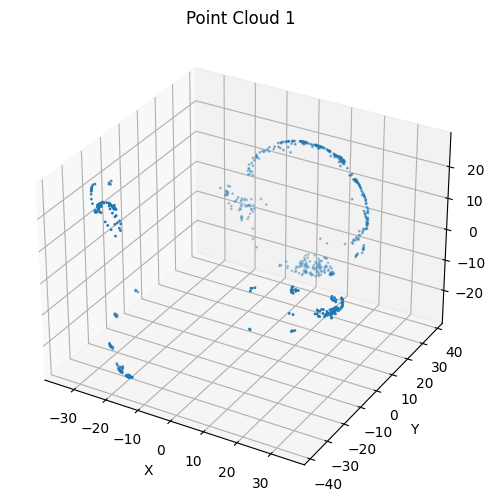

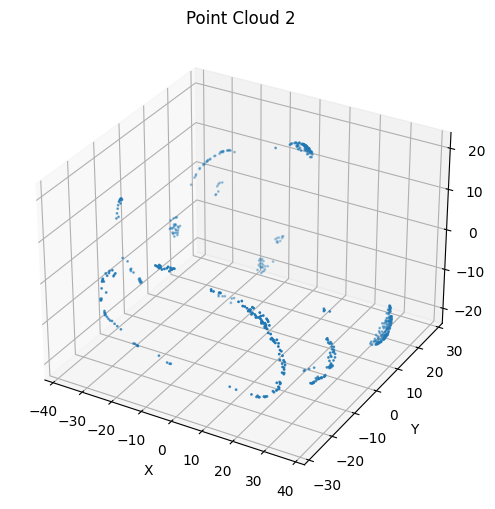

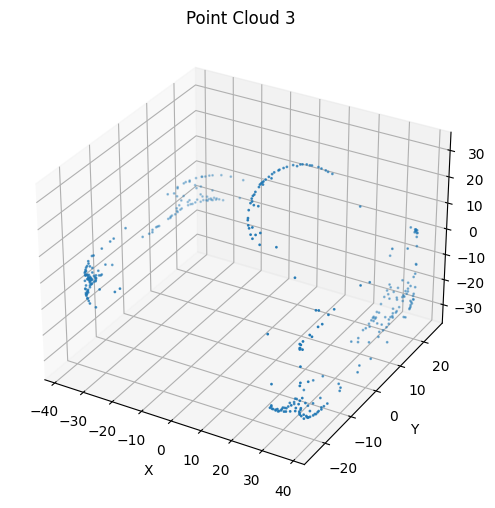

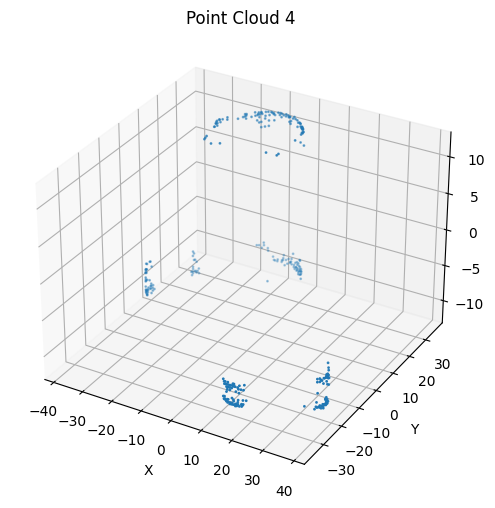

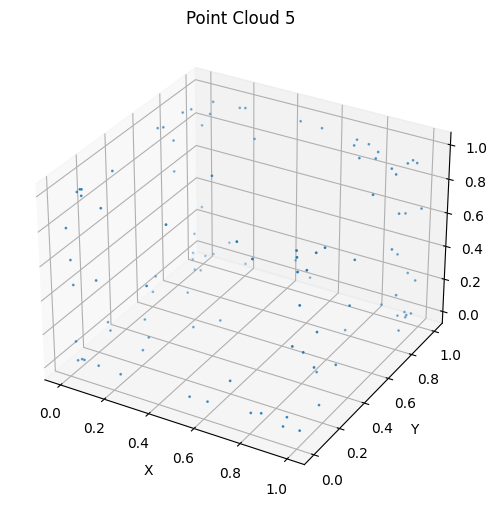

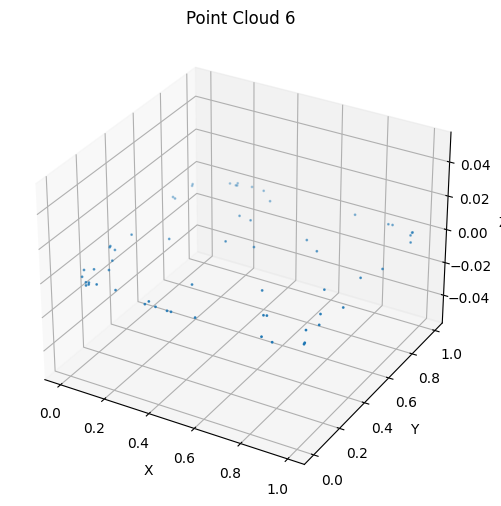

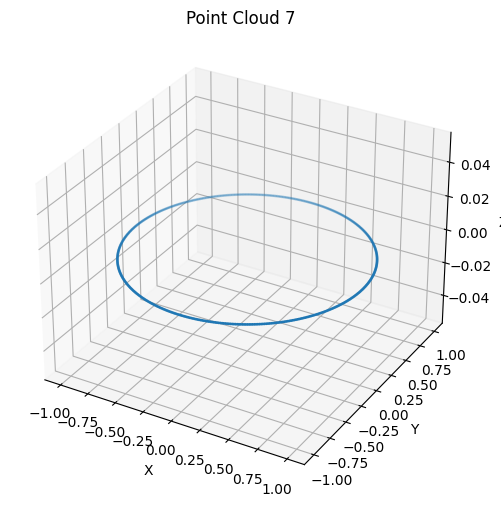

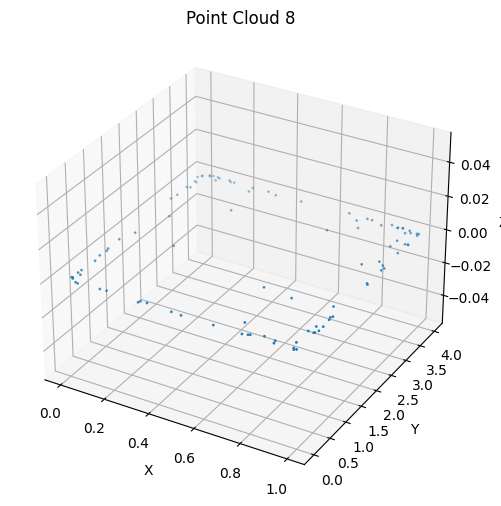

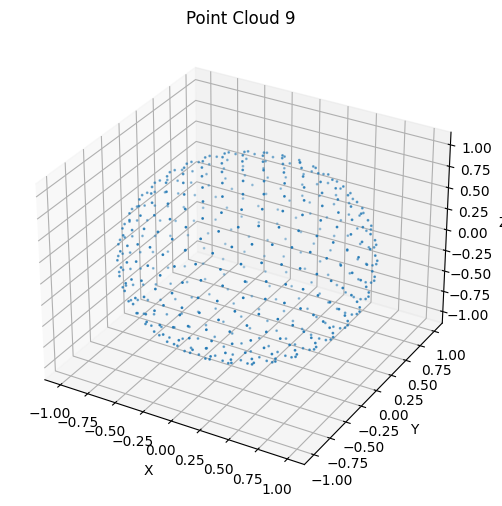

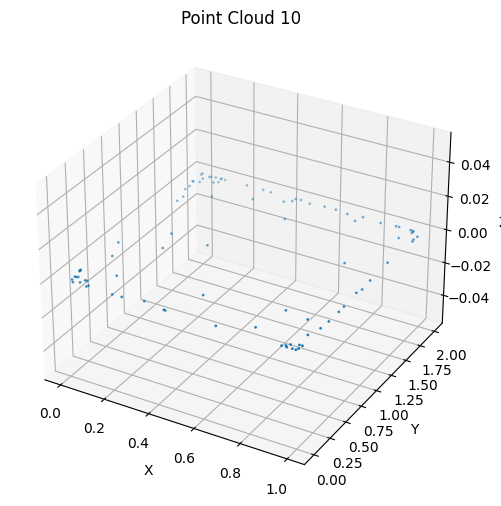

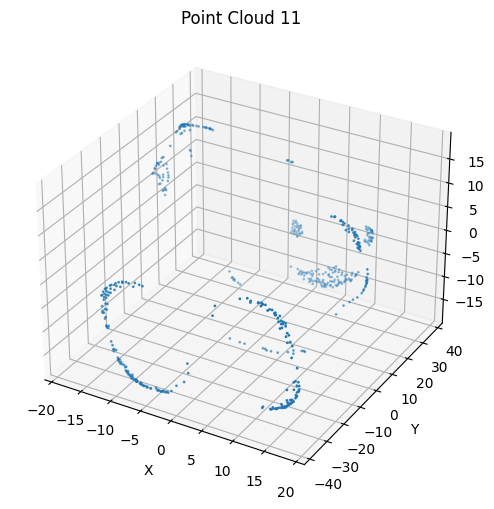

In [67]:
import matplotlib.pyplot as plt

def plot_point_cloud(mesh, title="Point Cloud", ax=None):
    points = mesh.vertices  # Extract vertices from the mesh

    if ax is None:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)  # 's' is the size of each point
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

for i, point_cloud in enumerate(new_meshes):
   plot_point_cloud(point_cloud, title=f"Point Cloud {i + 1}")

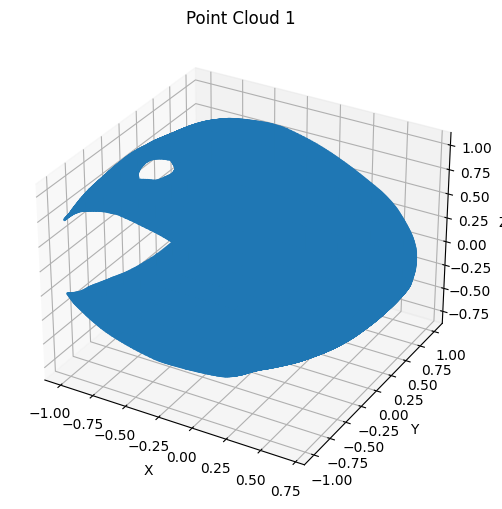

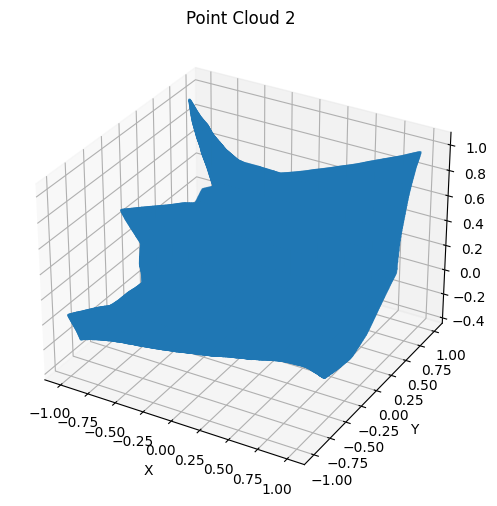

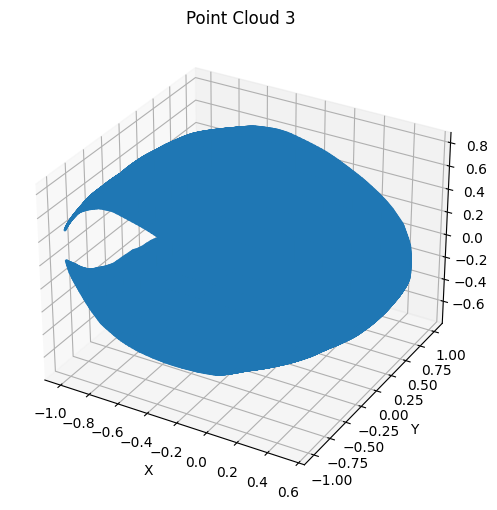

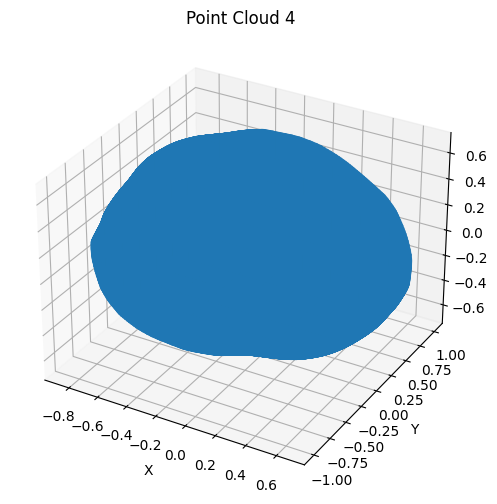

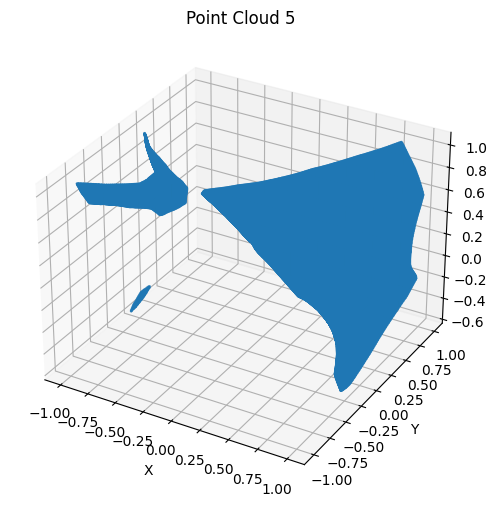

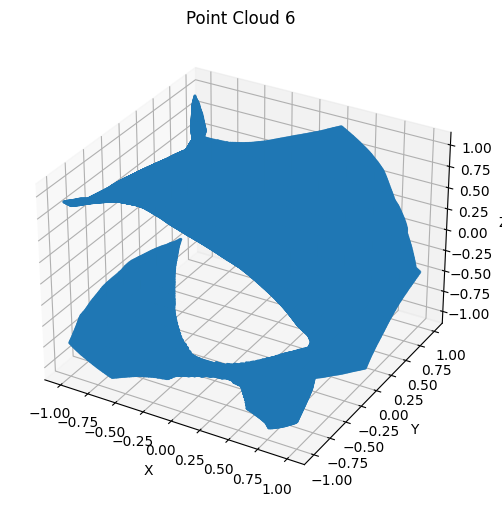

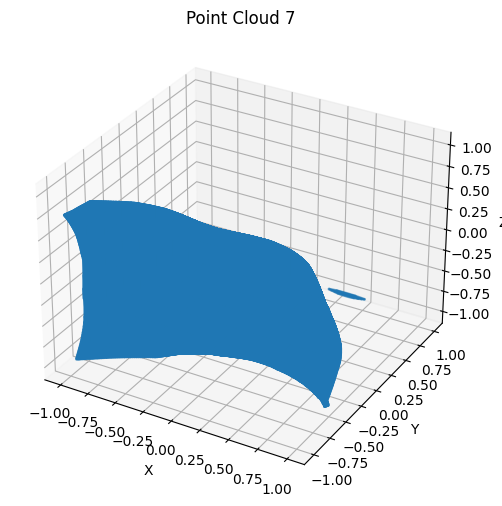

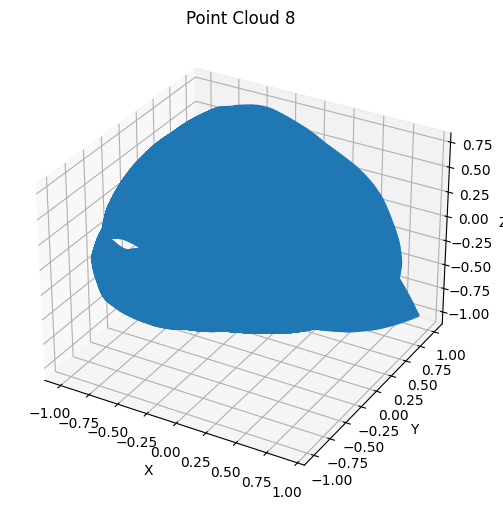

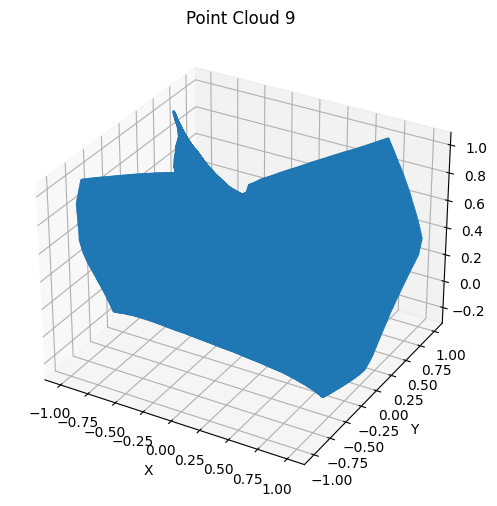

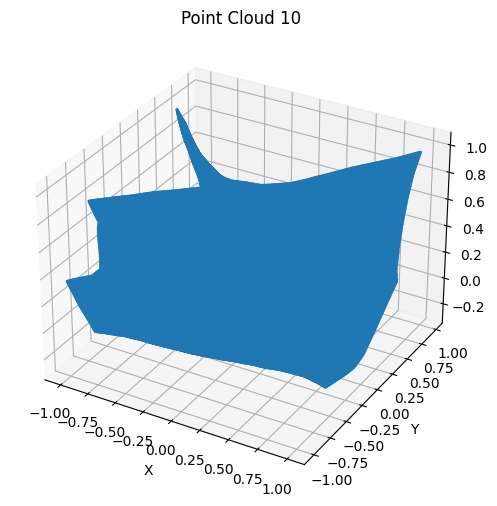

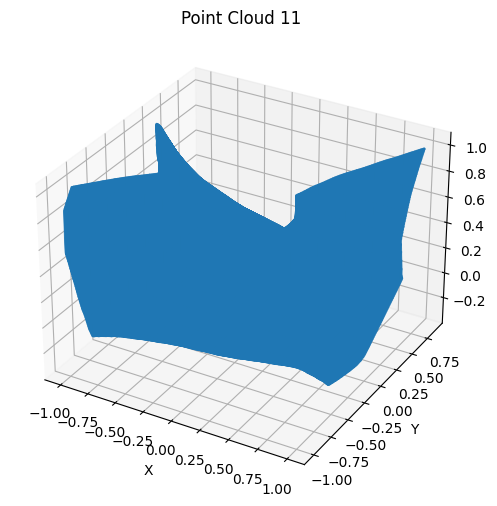

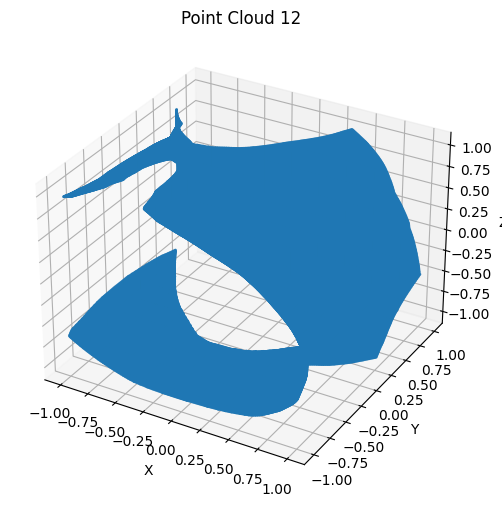

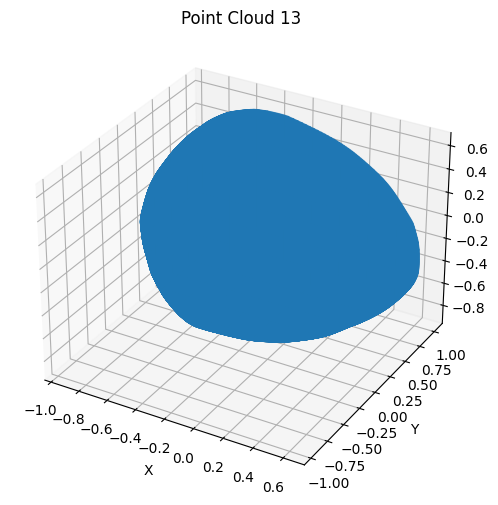

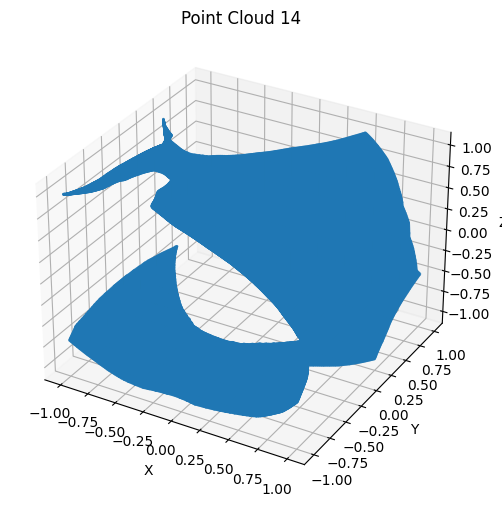

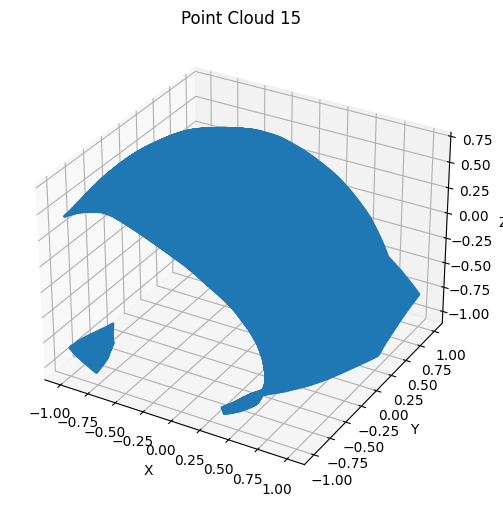

In [62]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from plyfile import PlyData
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.optim import Adam
from sklearn.decomposition import PCA
from torch.optim import Adam

class PointCloudProcessor:
    def __init__(self, point_clouds_directory):
        self.point_clouds_directory = point_clouds_directory
        self.point_clouds = self.load_and_preprocess_point_clouds()

    def load_point_cloud_from_ply(self, file_path):
        ply_data = PlyData.read(file_path)
        points = np.column_stack((ply_data['vertex']['x'], ply_data['vertex']['y'], ply_data['vertex']['z']))
        return torch.tensor(points, dtype=torch.float)

    def resample_point_cloud(self, point_cloud, num_points):
        if len(point_cloud) == num_points:
            return point_cloud
        elif len(point_cloud) > num_points:
            indices = np.random.choice(len(point_cloud), size=num_points, replace=False)
            return point_cloud[indices]
        else:
            raise ValueError("Point cloud has fewer points than required for resampling.")

    def plot_point_cloud(self, points, title="Point Cloud", ax=None):
        if ax is None:
            fig = plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)  # 's' is the size of each point
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

    def visualize_reconstruction(self, original, reconstructed, title1="Original", title2="Reconstructed"):
        fig = plt.figure(figsize=(12, 6))

        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(original[:, 0], original[:, 1], original[:, 2], s=1)
        ax1.title.set_text(title1)
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')

        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2], s=1)
        ax2.title.set_text(title2)
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')

        plt.show()

    def load_and_preprocess_point_clouds(self):
        point_cloud_files = [f for f in os.listdir(self.point_clouds_directory) if f.endswith('.ply')]
        point_clouds = [self.load_point_cloud_from_ply(os.path.join(self.point_clouds_directory, f)) for f in point_cloud_files]

        return point_clouds



if __name__ == "__main__":
    # Example usage:
    point_clouds_directory = '/content/reconstruction/'
    processor = PointCloudProcessor(point_clouds_directory)

    for i, point_cloud in enumerate(processor.point_clouds):
        processor.plot_point_cloud(point_cloud, title=f"Point Cloud {i + 1}")